In [1]:
import xcdat
from xcdat.regridder import grid
import cdms2


In [2]:
# dataset to use
# dpath = '/p/css03/esgf_publish/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/v20190308/*.nc'
# dpath = '20180215.DECKv1b_H1.ne30_oEC.edison_01_200001_200101_climo.nc'
#dpath = '/p/user_pub/e3sm/zhang40/xcdat_test_e3sm/TS_185001_201312.nc'
dpath = '/Users/zhang40/Documents/ACME_simulations/E3SM_v1/TS_185001_201312.nc'
# open dataset
ds = xcdat.open_dataset(dpath)


In [3]:
ds

<xarray.Dataset>
Dimensions:    (lat: 129, lon: 256, nbnd: 2, time: 1968)
Coordinates:
  * lat        (lat) float64 -90.0 -88.59 -87.19 -85.78 ... 87.19 88.59 90.0
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time       (time) object 1850-02-01 00:00:00 ... 2014-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
    gw         (lat) float64 ...
    area       (lat, lon) float64 ...
    TS         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/18)
    ne:                        30
    np:                        4
    Conventions:               CF-1.0
    source:                    CAM
    case:                      20180215.DECKv1b_H1.ne30_oEC.edison
    title:                     UNSET
    ...                        ...
    time_period_freq:          month_1
    history:                   Tue Aug 28 20:50:54 2018: ncks -t 2 -O --no_tm...
    NCO:                       netCDF Operators version 4.7.6 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /p/cscratch/acme/data/map_ne30np4_to_fv129x256...
    input_file:                /p/user_pub/e3sm/baldwin32/deck/v1_DECK_histor...

In [4]:
# create output grid
out_grid = grid.create_uniform_grid(-90, 90, 4.0, -180, 180, 5.0)

# regrid
ds2 = ds.regridder.regrid("TS", out_grid, tool="xesmf", method="bilinear")

In [5]:
ds2

<xarray.Dataset>
Dimensions:    (lon: 72, bnds: 2, lat: 45, time: 1968, nbnd: 2)
Coordinates:
  * lon        (lon) float64 -180.0 -175.0 -170.0 -165.0 ... 165.0 170.0 175.0
  * lat        (lat) float64 -90.0 -86.0 -82.0 -78.0 ... 74.0 78.0 82.0 86.0
  * time       (time) object 1850-02-01 00:00:00 ... 2014-01-01 00:00:00
Dimensions without coordinates: bnds, nbnd
Data variables:
    lon_bnds   (lon, bnds) float64 -182.5 -177.5 -177.5 ... 172.5 172.5 177.5
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -84.0 ... 84.0 84.0 88.0
    time_bnds  (time, nbnd) object 1850-01-01 00:00:00 ... 2014-01-01 00:00:00
    TS         (time, lat, lon) float32 247.6 247.6 247.6 ... 255.5 255.5 255.4

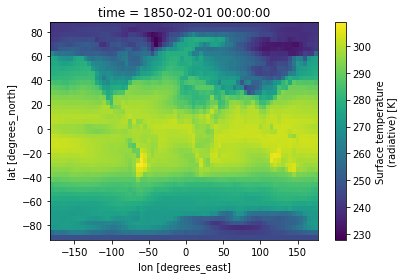

In [6]:
ds2.TS[0,].plot()

In [7]:
ds3 = ds.regridder.regrid("TS", out_grid, tool="xesmf", method="conservative")

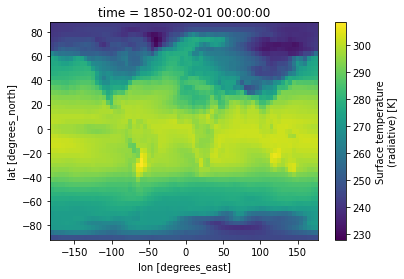

In [8]:
ds3.TS[0,].plot()

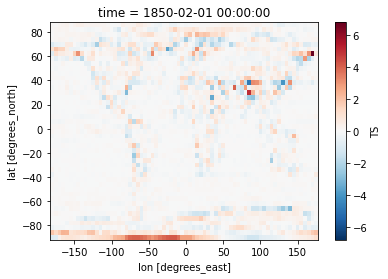

In [9]:
(ds3.TS[0,]-ds2.TS[0,]).plot()

In [10]:
fin = cdms2.open(dpath)

In [11]:
var = fin('TS')

In [12]:
# Note input for create uniform grids between cdms2 and xcdat are differet.
out_grid2=cdms2.grid.createUniformGrid(-90, 45, 4.0, -180, 72, 5.0)

In [13]:
var2 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="linear")

In [14]:
var3 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="conservative")


coordMin =  -90.00, boundMin =  -90.00, coordMax =   90.00, boundMax =   90.00
              


In [15]:
# The difference of data value resulted from cdms2 and xcdat regriders are always multiples of 1.52587890625e-05 /megabits
var2[0,]-ds2.TS[0,]

variable_22
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, -3.0517578125e-05, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, -1.52587890625e-05, 0.0, ..., 1.52587890625e-05, 0.0, 0.0],
        [0.0, 0.0, -1.52587890625e-05, ..., 0.0, 0.0, 1.52587890625e-05],
        [1.52587890625e-05, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [16]:
ds2.TS[0,].shape

(45, 72)

In [17]:
var3[0,]-ds3.TS[0,]

variable_28
masked_array(
  data=[[0.0, 0.0, 1.52587890625e-05, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, -3.0517578125e-05, ..., 0.0, 0.0, 0.0],
        [3.0517578125e-05, 0.0, -3.0517578125e-05, ..., 3.0517578125e-05,
         0.0, 0.0],
        ...,
        [0.0, 1.52587890625e-05, 1.52587890625e-05, ...,
         -1.52587890625e-05, -1.52587890625e-05, 0.0],
        [0.0, 0.0, -1.52587890625e-05, ..., 0.0, 1.52587890625e-05, 0.0],
        [0.0, 1.52587890625e-05, 1.52587890625e-05, ...,
         1.52587890625e-05, 0.0, 1.52587890625e-05]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [18]:
dpath = '/Users/zhang40/Documents/ACME_simulations/LAISHA_001101_002012.nc'

In [19]:
ds = xcdat.open_dataset(dpath)

In [20]:
ds

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, nbnd: 2, time: 120, hist_interval: 2)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time         (time) object 0011-02-01 00:00:00 ... 0021-01-01 00:00:00
Dimensions without coordinates: nbnd, hist_interval
Data variables:
    lat_bnds     (lat, nbnd) float64 ...
    lon_bnds     (lon, nbnd) float64 ...
    gw           (lat) float64 ...
    area         (lat, lon) float64 ...
    LAISHA       (time, lat, lon) float32 ...
    time_bounds  (time, hist_interval) object ...
Attributes: (12/31)
    title:                                     ELM History file information
    source:                                    E3SM Land Model
    case:                                      20210122.v2_test01.piControl.n...
    username:                                  ac.forsyth2
    hostname:                                  chrysalis
    git_version:                               9c271d95a
    ...                                        ...
    NCO:                                       netCDF Operators version 5.0.6...
    remap_script:                              ncremap
    remap_hostname:                            chr-0391
    remap_version:                             5.0.6
    map_file:                                  /home/ac.zender/data/maps/map_...
    input_file:                                trash/LAISHA_001101_002012.nc

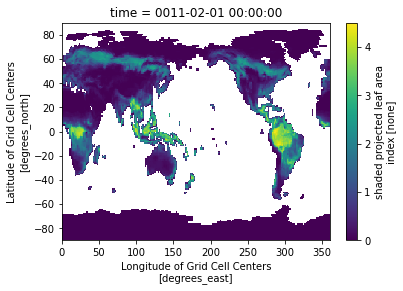

In [21]:
ds.LAISHA[0,].plot()

In [22]:

ds2 = ds.regridder.regrid("LAISHA", out_grid, tool="xesmf", method="bilinear")

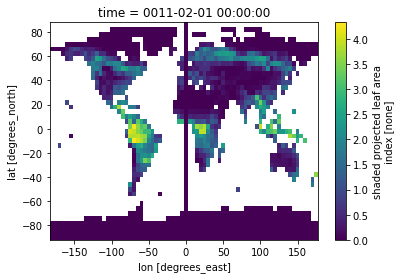

In [23]:
ds2.LAISHA[0,].plot() #prime medirian

In [24]:
ds3 = ds.regridder.regrid("LAISHA", out_grid, tool="xesmf", method="conservative")

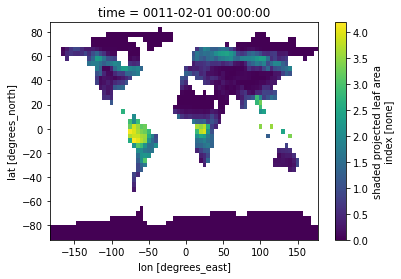

In [25]:
ds3.LAISHA[0,].plot()

In [26]:
fin = cdms2.open(dpath)

In [27]:
var = fin('LAISHA')

In [28]:
var2 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="linear")

In [30]:
var2[0,]-ds2.LAISHA[0,]

variable_45
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [31]:
var3 = var.regrid(out_grid2, regrid_tool="esmf", regrid_method="conservative")

In [32]:
var3[0,]-ds3.LAISHA[0,]

variable_63
masked_array(
  data=[[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)